In [1]:
%load_ext autoreload
%autoreload 2
import sys 
from os import path as pt
sys.path.append('../src')

import seaborn as sns
sns.set_theme()

In [2]:
import os 
model_dir = "../trained_models/PDVPriceConFeature_timestep_60/model_InfoCVAE_De_CLSTMRes_En_CLSTMRes_Prior_RealNVP_Con_Id_Dis_None_comment_None/InfoCVAE_training_2024-08-21_16-06-50/final_model"
os.makedirs(model_dir,exist_ok=True)

## Evaluation the best model 

In [3]:
from copy import deepcopy
from evaluations.hyperparameter import ModelEvaluator
from tsvae.utils.random_utils import set_seed
import matplotlib.pyplot as plt


model_evaluator = ModelEvaluator(model_dir)
output_dir = model_evaluator.hyper_model_dir
model = model_evaluator.model

test_data, gen_data, recon_data = model_evaluator.load_data(seed = 99)
ds = model_evaluator.data_ppl.base_dataset
exp_config = deepcopy(model_evaluator.exp_config)

real_data = test_data
recon_data = recon_data
fake_data = gen_data


Base dataset initialized


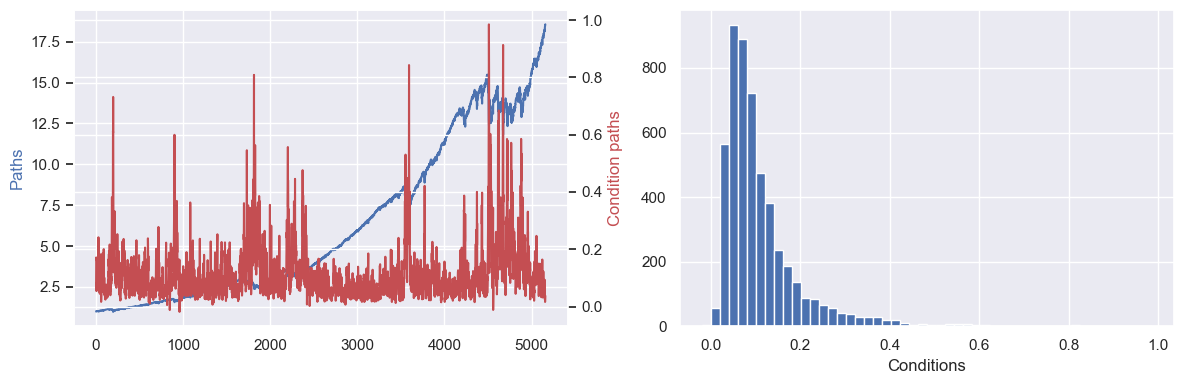

In [4]:
from evaluations.eval_con import plot_path_condition
plot_path_condition(ds.path,ds.sigma[0,:,0])

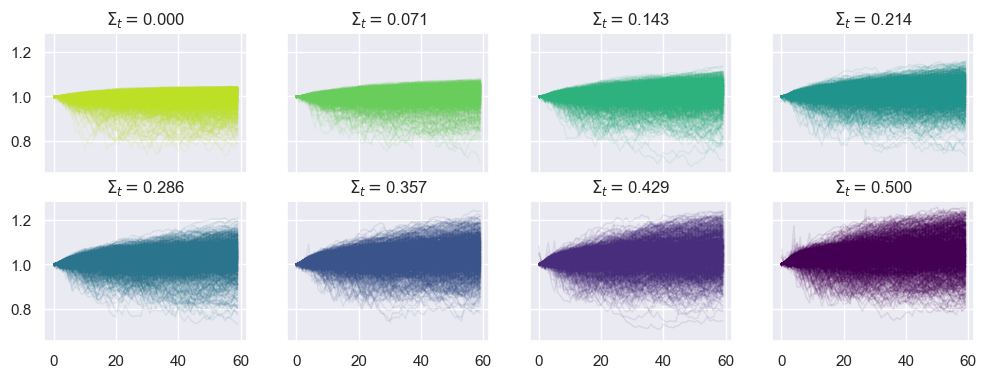

In [5]:
from evaluations.eval_con import con_gen_plot
import numpy as np
conditions = np.linspace(0,0.5,8)
file_path = pt.join(output_dir, 'conditional_generations.png')
con_gen_plot(model, conditions, file_path = file_path)

100%|██████████| 5/5 [00:01<00:00,  3.72it/s]


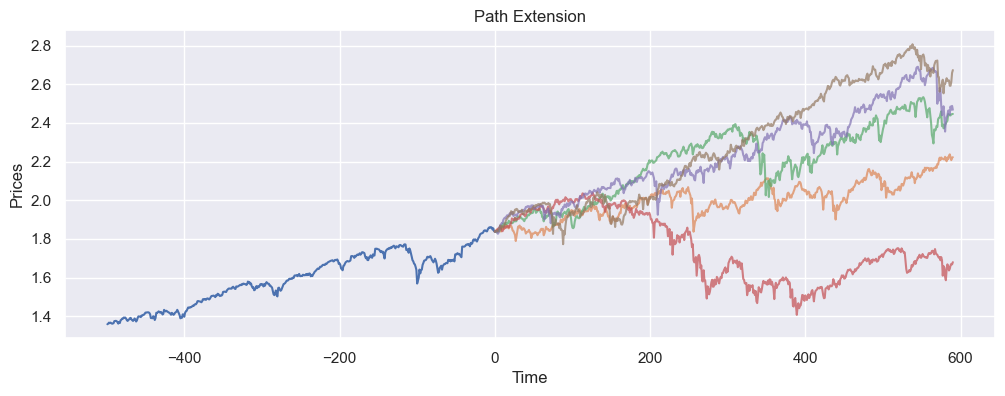

In [6]:
from evaluations.eval_con import plot_path_extension
file_path = pt.join(output_dir, 'path_extension.png')
extended_paths = plot_path_extension(ds.path, model, exp_config, n_extend_path = 5, n_extend_time = 10, file_path=file_path)

In [7]:
from evaluations.eval_con import load_data_eval_dist_con, compute_eval_dist_con, plot_eval_dist_con
n_sample = 5000
con_paths_dict = load_data_eval_dist_con(n_sample, ds, model, output_dir, plot = True)

Already exits


Already exits
Load metrics
Load metrics
Load metrics


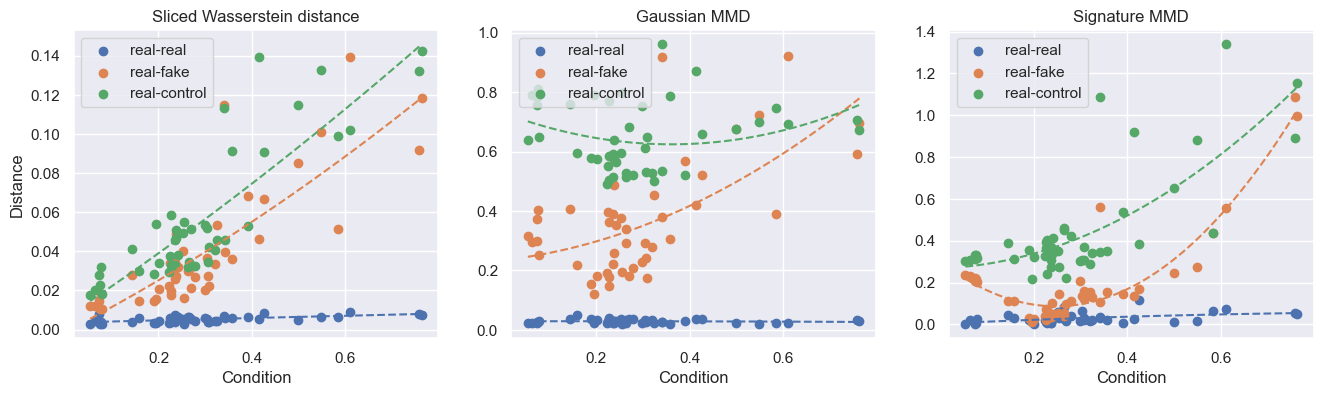

In [8]:
from evaluations.eval_con import load_data_eval_dist_con, compute_eval_dist_con, plot_eval_dist_con
n_sample = 5000
con_paths_dict = load_data_eval_dist_con(n_sample, ds, model, output_dir, plot = True)

mmd_con_metric_dict = compute_eval_dist_con(con_paths_dict, 'mmd', output_dir)
swd_con_metric_dict = compute_eval_dist_con(con_paths_dict, 'swd', output_dir)
esig_con_metric_dict = compute_eval_dist_con(con_paths_dict, 'esig', output_dir)

file_path = pt.join(output_dir, 'swd_mmd_esig_dist.png')
plot_eval_dist_con(mmd_con_metric_dict, swd_con_metric_dict, esig_con_metric_dict, file_path=file_path)

In [9]:
from evaluations.eval_con import compute_eval_awd_dist_con
n_compute_awd = 500
n_slices = 10
len_slices = 3
# condition_awd_dist_dict = compute_eval_awd_dist_con(con_paths_dict, output_dir, n_compute_awd=n_compute_awd, n_slices=n_slices, len_slices=len_slices)

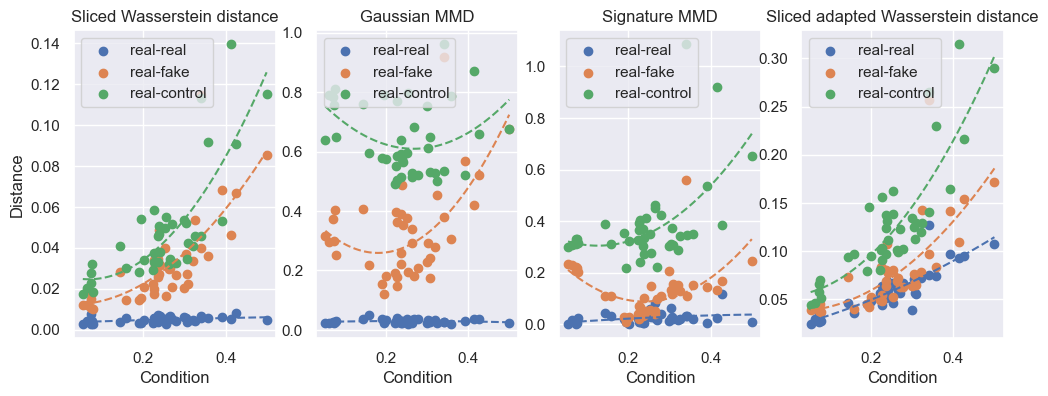

In [10]:
from evaluations.eval_con import plot_eval_dist_con_allin1
from tsvae.utils.load_save_utils import load_obj
file_path = pt.join(output_dir, f'conditional_awd_metric_dict_{n_compute_awd}_{n_slices}_{len_slices}.pkl')
sawd_con_metric_dict = load_obj(file_path)
for key, values in sawd_con_metric_dict.items():
    sawd_con_metric_dict[key] = {'realreal': sawd_con_metric_dict[key]['real2'],
                                 'realfake': sawd_con_metric_dict[key]['fake'],
                                 'realcontrol': sawd_con_metric_dict[key]['bs'],
                                 }
file_path = pt.join(output_dir, 'swd_mmd_esig_sawd_dist.png')
plot_eval_dist_con_allin1(mmd_con_metric_dict, swd_con_metric_dict, esig_con_metric_dict, sawd_con_metric_dict, file_path = file_path)